In [21]:
import pandas as pd
import numpy as np

Vấn đề phân loại:

Dự đoán xem khách hàng có hủy đăng ký hay không.

Ví dụ:

Một công ty viễn thông muốn dự đoán xem khách hàng của họ có hủy đăng ký dịch vụ hay không. Họ có thể sử dụng dữ liệu của khách hàng, chẳng hạn như giới tính, độ tuổi, loại đăng ký và mức sử dụng dịch vụ, để xây dựng mô hình phân loại. Mô hình này có thể được sử dụng để dự đoán khả năng hủy đăng ký của khách hàng, từ đó công ty viễn thông có thể chủ động đưa ra các chương trình khuyến mãi hoặc chăm sóc khách hàng để giữ chân khách hàng.

Gồm các thuộc tính (Attributes): 

|Thuộc tính| Phiên dịch | Mô tả
| ----------- | ----------- |------|
|Gender | (Giới tính - Nhị phân) | Nam hoặc Nữ|
|Age  | (Tuổi - Tam phân) | Gồm 3 độ tuổi: dưới 25 (<25), từ 25-40, và trên 40 tuổi (>40)  |
|Subscription type | (Loại đăng kí - Tứ phân) | Hàng tháng (Monthly), hàng quý(Quarterly), hàng năm(Annual) hoặc trọn gói cả đời(Lifetime) |
|Usage | (Nhu cầu sử dụng - Tứ phân) | Thấp (Low), Trung bình (Medium), Cao (High), hoặc Rất cao(Very High) |
|Satisfaction | (Độ thoả mãn - Số thực) | 1 số từ 1 đến 5, với 1 là ít thỏa mãn nhất và 5 là thỏa mãn nhất|

Nhãn (Label):
Churn (Bỏ đăng ký - Nhị phân): Yes hoặc No|


In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Thay thế các nhãn thành dạng số để train mô hình

In [23]:
def replace_label(df):
  """Replaces the "Yes" and "No" churn labels with 1 and 0, respectively.

  Args:
    df: A Pandas DataFrame containing the churn data.

  Returns:
    A Pandas DataFrame with the churn label replaced with 1 or 0.
  """
  df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
  df["Age"] = df["Age"].map({"<25": 0, "25-40": 1, ">40": 2})
  df["Subscription type"] = df["Subscription type"].map({"Monthly": 0, "Quarterly": 1, "Annual": 2, "Lifetime": 3})
  df["Usage"] = df["Usage"].map({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})
  df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

  return df

In [24]:
train = replace_label(train)
test = replace_label(test)
train

,Gender,Age,Subscription type,Usage,Satisfaction,Churn
0,1,0,0,0,3,1
1,0,1,3,1,1,0
2,1,2,2,2,5,0
3,0,0,0,3,5,0
4,1,1,1,0,1,1
...,...,...,...,...,...,...
95,0,0,0,1,3,0
96,1,1,1,2,1,1
97,0,2,2,3,5,1
98,1,0,0,0,2,0


In [25]:
import matplotlib .pyplot as plt
from sklearn.tree import DecisionTreeClassifier , plot_tree

class CustomerChurnPredictorEntropy:
    def __init__(self):
        self.clf = DecisionTreeClassifier(criterion="entropy")

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)
    
    def visualize(self):
        plot_tree(self.clf, filled=True)
        plt.figure(figsize=(24,24))
        plt.show()

class CustomerChurnPredictorGini:
    def __init__(self):
        self.clf = DecisionTreeClassifier(criterion="gini")

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)
    
    def visualize(self):
        plot_tree(self.clf, filled=True)
        plt.figure(figsize=(24,24))
        plt.show()

# Create the predictor
predictor1 = CustomerChurnPredictorEntropy()

# Create the predictor
predictor2 = CustomerChurnPredictorGini()

In [26]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:,-1]

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

Trực quan hóa 2 mô hình cây quyết định

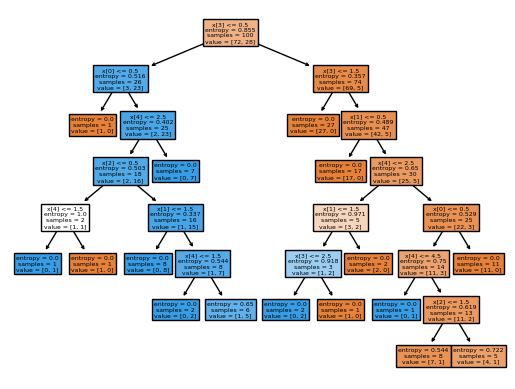

<Figure size 2400x2400 with 0 Axes>

In [28]:
predictor1.fit(x_train, y_train)
predictor1.visualize()

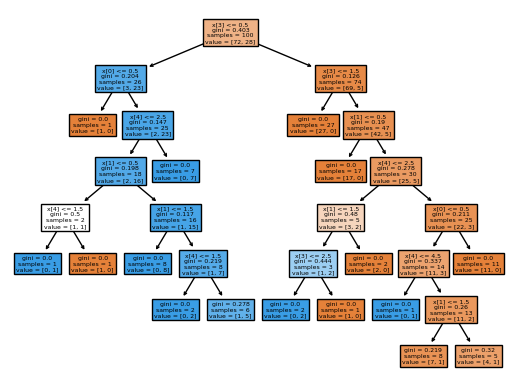

<Figure size 2400x2400 with 0 Axes>

In [30]:
predictor2.fit(x_train, y_train)
predictor2.visualize()

Có thể kết luận rằng, 2 cây quyết định này có độ tương đồng với nhau khá cao, rất sâu và có nhiều node.


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model,x_test,y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1score)

In [35]:
evaluate(predictor1, x_test,y_test)

Accuracy: 0.49166666666666664
Precision: 0.4444444444444444
Recall: 0.20689655172413793
F1 score: 0.2823529411764706


Qua việc sử dụng Entropy, và các thông số trên, có thể thấy được:

- Accuracy:  Mô hình chỉ dự đoán được đúng khoảng 49% số nhãn, đây thực sự là điều không tốt
- Precision: Precision với 0.4444 đồng nghĩa với việc 44% dự đoán positive của mô hình là chính xác, điều này cũng không tốt
- Recall: Mô hình chỉ dự đoán được đúng khoảng 20% số nhãn positive, đây là con số rất thấp
- F1 score: 0.2824 là chỉ số đồng điệu giữa harmonic mean of precision and recall. Con số này cũng khá thấp, cho thấy mô hình không hoạt động tốt giữa precision hoặc recall

In [36]:
evaluate(predictor2,x_test,y_test)

Accuracy: 0.5
Precision: 0.4642857142857143
Recall: 0.22413793103448276
F1 score: 0.3023255813953489


Qua việc sử dụng tiêu chí Gini, và các thông số trên, có thể thấy được:
- Tất cả thông số của tiêu chí Gini tuy có cải thiện so với mô hình sử dụng tiêu chí Entropy, tuy nhiên thì mô hình này vẫn không đem lại kết quả quá khả quan, khi cả 4 thông số Accuracy, Precision, Recall và F1-score đều chỉ hơn tiêu chí Entropy khoảng 0.01 đến 0.02

Một số nguyên nhân có thể rút ra được:
- Dữ liệu bị nhiễu, do chưa trải qua giai đoạn preprocessing mà chỉ có tạo ngẫu nhiên sử dụng công cụ AI (Cụ thể là Bard)
- Cây có quá nhiều node, chứng tỏ tồn tại khả năng mô hình cây này đã bị overfitting
- Quá trình mã hóa dữ liệu vẫn chưa trọn vẹn, ở đây em đã sử dụng encode bằng số, nên kết quả xuất ra sẽ không chính xác được như các phương pháp encode khác, như phương pháp mã hóa One-hot đối với các thuộc tính Age, Subscription type và Usage, nên không đưa ra được kết quả trực quan hơn